In [3]:
import pandas as pd

In [4]:
#loading dataset
data = pd.read_csv('japan_auto_sales.csv')

In [5]:
#displaying the fisrt few rows
print (data.head())

   Year     Month Manufacturer    Model  Sales    Region
0  2023   January       Toyota    Prius   2500     Tokyo
1  2023   January        Honda    Civic   1800     Osaka
2  2023  February       Nissan     Leaf   1500     Kyoto
3  2023  February       Toyota  Corolla   3000  Yokohama
4  2023     March        Honda   Accord   1200    Nagoya


In [6]:
#displaying basic information about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          10 non-null     int64 
 1   Month         10 non-null     object
 2   Manufacturer  10 non-null     object
 3   Model         10 non-null     object
 4   Sales         10 non-null     int64 
 5   Region        10 non-null     object
dtypes: int64(2), object(4)
memory usage: 608.0+ bytes
None


In [7]:
#displaying summery stats of the dataset
print(data.describe(include='all'))

          Year    Month Manufacturer  Model        Sales Region
count     10.0       10           10     10    10.000000     10
unique     NaN        5            3     10          NaN      8
top        NaN  January       Toyota  Prius          NaN  Tokyo
freq       NaN        2            4      1          NaN      2
mean    2023.0      NaN          NaN    NaN  1950.000000    NaN
std        0.0      NaN          NaN    NaN   696.419414    NaN
min     2023.0      NaN          NaN    NaN   800.000000    NaN
25%     2023.0      NaN          NaN    NaN  1550.000000    NaN
50%     2023.0      NaN          NaN    NaN  1900.000000    NaN
75%     2023.0      NaN          NaN    NaN  2425.000000    NaN
max     2023.0      NaN          NaN    NaN  3000.000000    NaN


In [8]:
#data cleaning
#checking missing value
print(data.isnull().sum())

Year            0
Month           0
Manufacturer    0
Model           0
Sales           0
Region          0
dtype: int64


In [9]:
#checking duplicates
print(data.duplicated().sum())

0


**Basic Analysis**

In [10]:
#group by manufacturer and sum the sales
sales_by_manufacturer = data.groupby('Manufacturer')['Sales'].sum()

#dislplay group
print(sales_by_manufacturer)

Manufacturer
Honda      4700
Nissan     4300
Toyota    10500
Name: Sales, dtype: int64


In [11]:
#group by region and sum the sales
sales_by_region = data.groupby('Region')['Sales'].sum()

#displaying the group
print(sales_by_region)

Region
Fukuoka     1700
Kobe        2000
Kyoto       1500
Nagoya      1200
Osaka       4000
Sapporo     2800
Tokyo       3300
Yokohama    3000
Name: Sales, dtype: int64


**Data Visualizing**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

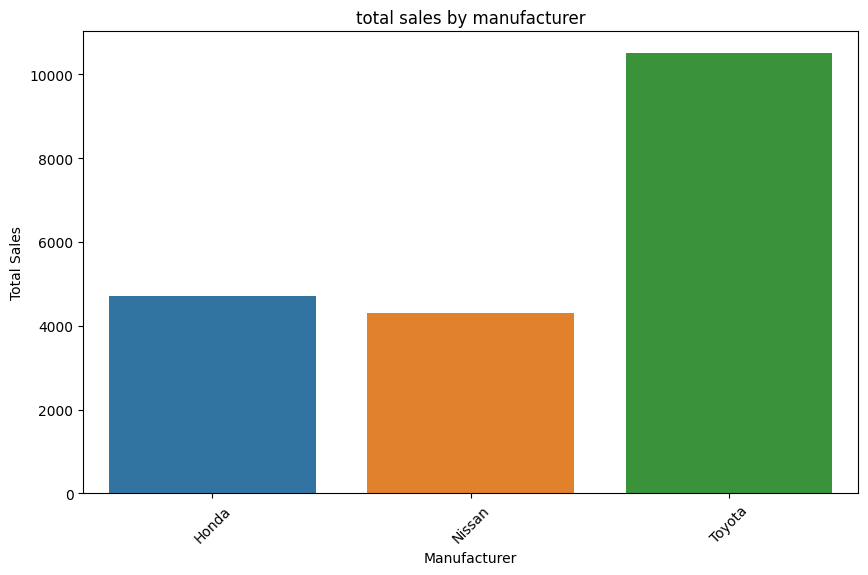

In [13]:
#creating a bar chart for sales by manufacturer

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_manufacturer.index,y=sales_by_manufacturer.values)
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales')
plt.title('total sales by manufacturer')
plt.xticks(rotation=45)
plt.show()

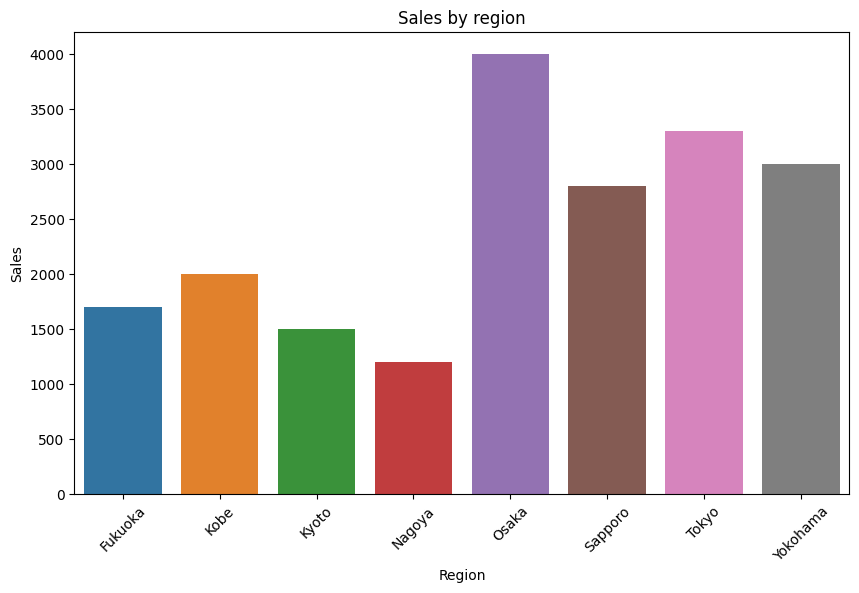

In [14]:
#visualizing bar chart for sales by region

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales by region')
plt.xticks(rotation=45)
plt.show()

In [16]:
#converting 'Year' and 'Month' columns to date time object
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Setting 'Date' as index
data.set_index('Date', inplace=True)

# Resampling the data by month and sum the sales
monthly_sales = data['Sales'].resample('M').sum()

# Plotting the monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

ValueError: Unable to parse string "January" at position 0